In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
# Read the CSV file containing Bengaluru house data into a DataFrame
df=pd.read_csv('Bengaluru_House_Data.csv')
# Display the first 5 rows of the DataFrame to understand its structure and the data it contains
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
# Get the shape of the DataFrame (number of rows and columns)
print("Shape of the dataset :")
print(df.shape)  # Displays the number of rows and columns in the DataFrame


Shape of the dataset :
(13320, 9)


In [ ]:
# Check for missing (null) values in each column of the DataFrame
print("Number of missing values in each column:")
print(df.isnull().sum())  # Displays the count of missing values in each column of the DataFrame


Number of missing values in each column:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64


<ipython-input-71-e5e7be7ee27b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="area_type", data=df, palette="viridis")


<Axes: xlabel='area_type', ylabel='count'>

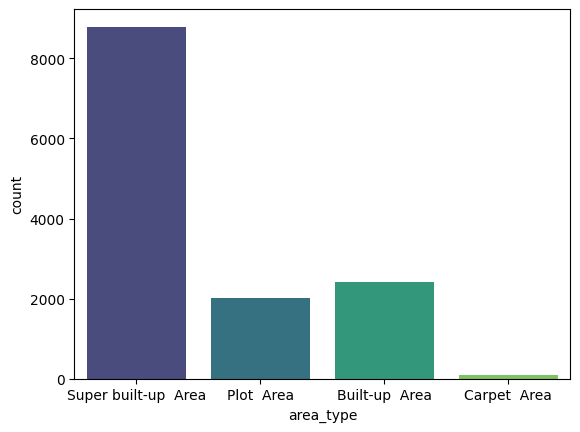

In [ ]:
df['area_type'].value_counts()
sns.countplot(x="area_type", data = df)
# Value counts
print(df['area_type'].value_counts())

# Countplot with color
sns.countplot(x="area_type", data=df, palette="viridis")



In [ ]:
df.drop(['society','balcony', 'availability','area_type'], axis='columns', inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
# Get the count of unique values in the "size" column
print("Count of unique values in the 'size' column:")
print(df["size"].value_counts())  # Displays the frequency of each unique value in the 'size' column



Count of unique values in the 'size' column:
size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64


In [ ]:
# Extract numerical values (number of bedrooms) from the 'size' column using a regular expression
# The regex pattern r'(\d+)' captures one or more digits in the 'size' column
# Fill missing values (if any) with 0 and convert the extracted values to integers
df['num_bhk'] = df['size'].str.extract(r'(\d+)').fillna(0).astype(int)

# Display the first 5 rows to check the updated DataFrame with the new 'num_bhk' column
print("First 5 rows after extracting number of BHKs:")
df.head()  # Shows the updated DataFrame with the new column


First 5 rows after extracting number of BHKs:


,location,size,total_sqft,bath,price,num_bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
# Filter the DataFrame to display rows where the 'num_bhk' column is greater than 20
# This helps identify any unusual data entries where the number of bedrooms is excessively high
print("Rows with more than 20 BHKs:")
df.loc[df['num_bhk'] > 20] # Displays rows where the number of BHK is greater than 20


Rows with more than 20 BHKs:


,location,size,total_sqft,bath,price,num_bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
# Get the unique values from the 'total_sqft' column
print("Unique values in the 'total_sqft' column:")
unique_total_sqft = df['total_sqft'].unique()  # Extracts unique values from the 'total_sqft' column
print(unique_total_sqft)  # Displays the unique square footage values


Unique values in the 'total_sqft' column:
['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


In [ ]:
# Function to check if a value can be converted to a float
# This helps identify if a value is a valid numerical value or not
def check_float(value):
    try:
        # Try to convert the value to a float
        float(value)
        return True  # If conversion succeeds, return True (indicating it's a float)
    except ValueError:
        # If a ValueError is raised, return False (indicating it's not a float)
        return False


In [ ]:
# Display rows where 'total_sqft' values are not floats
df[~df['total_sqft'].apply(check_float)]
df.head(10)


,location,size,total_sqft,bath,price,num_bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [ ]:
def process_sqft_v2(value):
    # Check if the value contains a range (indicated by a hyphen)
    if '-' in value:
        # Split the range string into low and high values, then compute the average
        low, high = map(float, value.split('-'))
        return (low + high) / 2  # Return the average of the two values

    try:
        # If the value is a single number, convert it to float and return it
        return float(value)
    except ValueError:
        # If conversion fails, return None to indicate an invalid value
        return None



In [ ]:
# Ensuring 'price' and 'total_sqft' columns are numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

# Creating the 'price_per_sqft' column directly
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
df.head()


,location,size,total_sqft,bath,price,num_bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
# Cleaning the 'location' column by stripping extra spaces and handling NaN values
df['location'] = df['location'].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Grouping the data by 'location' and counting occurrences
location_counts = df.groupby('location')['location'].agg('count').sort_values(ascending=False)

# Printing the location counts
print("Location-wise Count of Records:")
print(location_counts)


Location-wise Count of Records:
location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64


In [ ]:
df.head()

# Dimensionality Reduction


In [ ]:
# Count the occurrences of locations with 10 or fewer data points
other_locations = location_counts[location_counts <= 10].index

# Replace these locations with 'other' using the .isin() method
df['location'] = df['location'].where(~df['location'].isin(other_locations), 'other')

# Check the number of unique locations after modification
print(len(df['location'].unique()))

# Display the first 10 rows of the modified DataFrame
df.head()


242


,location,size,total_sqft,bath,price,num_bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


<Axes: ylabel='location'>

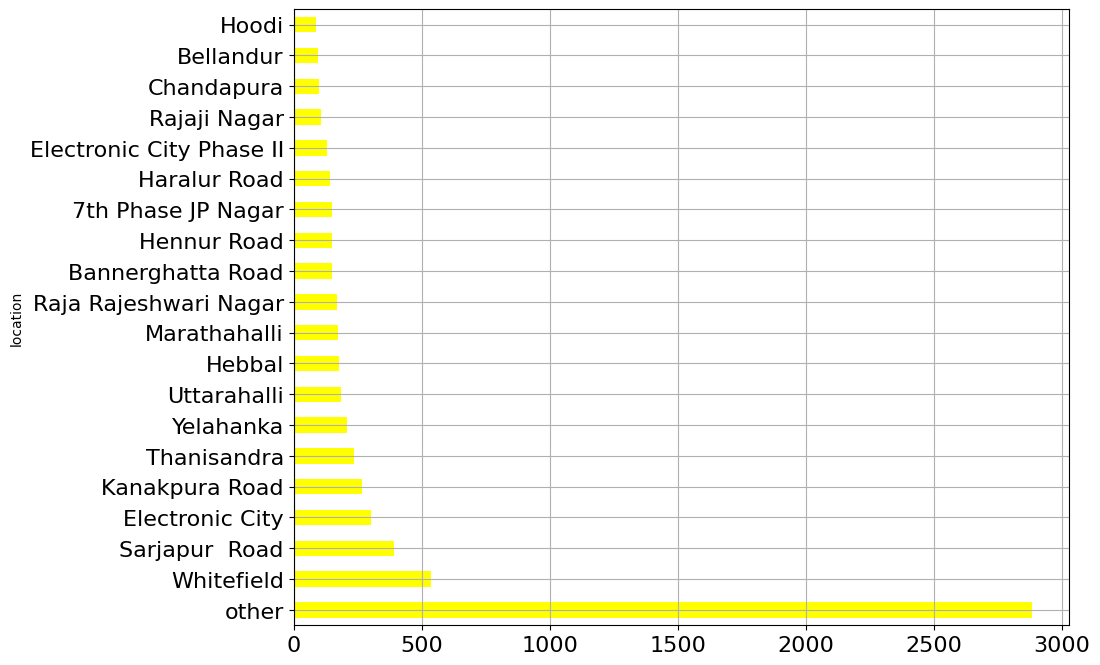

In [ ]:
# Get the top 20 most frequent locations
top_locations = df.groupby('location')['location'].agg('count').nlargest(20)

# Plot the top 20 locations as a horizontal bar plot with custom color
top_locations.plot(kind='barh', figsize=(10, 8), color='yellow', fontsize=16.0, grid=True)


# **Outlier Detection**
Based on general knowledge, a sqft/bedroom ratio below ~300 is considered an outlier, with the average bedroom size taken from
https://www.thisoldhouse.com/foundations/reviews/average-square-footage-of-a-bedroom#:~:text=Get%20Quote-,Standard%20Bedroom%20Sizes,typical%20bed%20sizes%20in%20each.



In [ ]:
# Filter and display rows where sqft/bedroom ratio is below 300 (outliers)
df[df['total_sqft'] / df['num_bhk'] < 300].head()


,location,size,total_sqft,bath,price,num_bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
df.shape

(13246, 7)

In [ ]:
# Remove rows where the sqft/bedroom ratio is below 300 (outliers)
df= df[df['total_sqft'] / df['num_bhk'] >= 300]

# Print the updated shape of the DataFrame after removing outliers
print(f"Shape of DataFrame after removing outliers: {df.shape}")

# Print the first 5 rows of the DataFrame to inspect the data
print("\nFirst 5 rows of the updated DataFrame:")
df.head()


Shape of DataFrame after removing outliers: (12312, 7)

First 5 rows of the updated DataFrame:


,location,size,total_sqft,bath,price,num_bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
# Step 1: Access the 'price_per_sqft' column from the DataFrame
price_column = df['price_per_sqft']

# Step 2: Generate summary statistics using the describe() method
price_summary = price_column.describe()

# Step 3: Output the result in a readable format
print("Summary Statistics for 'price_per_sqft' Column:")
print(price_summary)


Summary Statistics for 'price_per_sqft' Column:
count     12312.000000
mean       6323.403514
std        4187.211055
min         267.829813
25%        4208.545855
50%        5300.000000
75%        6938.987948
max      176470.588235
Name: price_per_sqft, dtype: float64



The 'price_per_sqft' column has a total of 12,312 entries, with a mean of 6,323.40 and a large variation (standard deviation of 4,187.21). The values range from 267.83 to 176,470.59, indicating significant price discrepancies within the dataset.

In [ ]:
def remove_outliers(df):
    for location, subset in df.groupby('location'):
        mean_price = subset['price_per_sqft'].mean()
        std_price = subset['price_per_sqft'].std()

        # Filter out the outliers for the current location
        df = df[(df['location'] != location) |
                ((df['price_per_sqft'] > (mean_price - std_price)) &
                 (df['price_per_sqft'] <= (mean_price + std_price)))]

    return df

# Apply the function to remove outliers
df1=remove_outliers(df)
df1.shape

(10196, 7)

In [ ]:
df1.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0
num_bhk,0
price_per_sqft,0


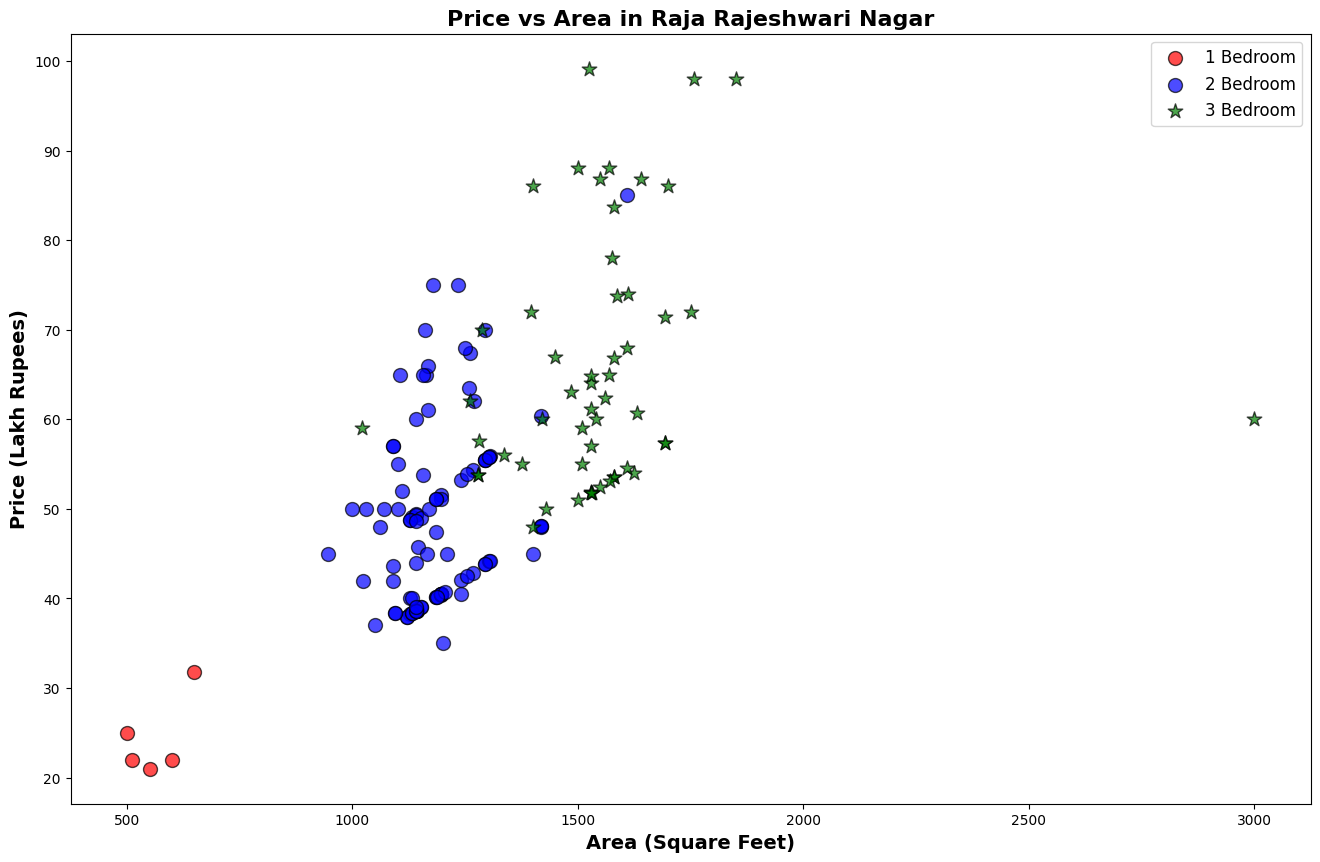

In [ ]:

def plot_area_vs_price(df, area_name):
    filtered_data = df[df['location'] == area_name]
    plt.figure(figsize=(16, 10))
    plt.scatter(filtered_data[filtered_data['num_bhk'] == 1]['total_sqft'],
                filtered_data[filtered_data['num_bhk'] == 1]['price'], color='red', label='1 Bedroom', s=100, alpha=0.7, edgecolors='black')
    plt.scatter(filtered_data[filtered_data['num_bhk'] == 2]['total_sqft'],
                filtered_data[filtered_data['num_bhk'] == 2]['price'], color='blue', label='2 Bedroom', s=100, alpha=0.7, edgecolors='black')
    plt.scatter(filtered_data[filtered_data['num_bhk'] == 3]['total_sqft'],
                filtered_data[filtered_data['num_bhk'] == 3]['price'], color='green', label='3 Bedroom', s=120, alpha=0.7, edgecolors='black', marker='*')
    plt.xlabel("Area (Square Feet)", fontsize=14, fontweight='bold')
    plt.ylabel("Price (Lakh Rupees)", fontsize=14, fontweight='bold')
    plt.title(f"Price vs Area in {area_name}", fontsize=16, fontweight='bold')


    # Add a legend with larger font size
    plt.legend(fontsize=12)

    # Show the plot
    plt.show()

# Call the function for the area "Whitefield"
plot_area_vs_price(df, "Raja Rajeshwari Nagar")

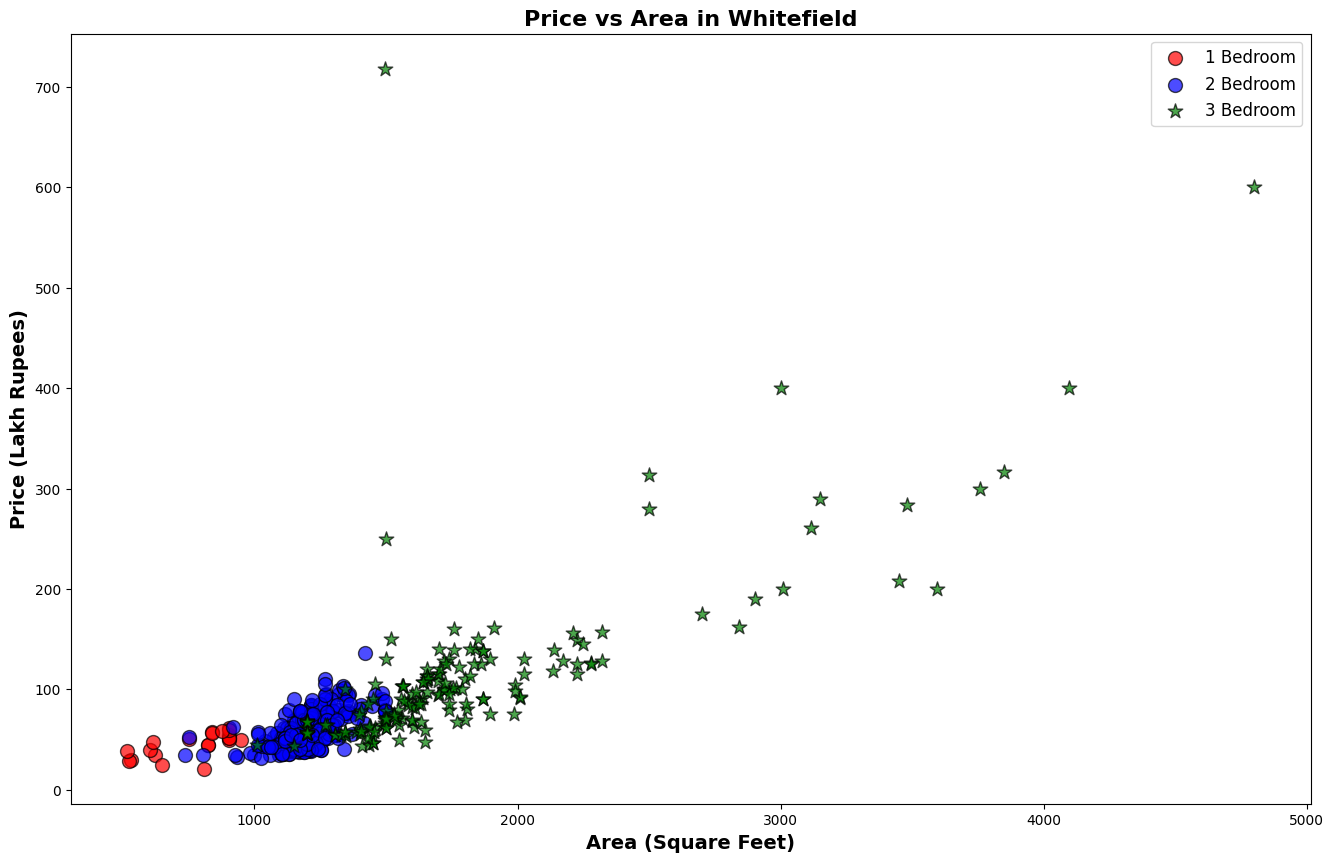

In [ ]:
plot_area_vs_price(df, "Whitefield")


In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('num_bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('num_bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
remove_bhk_outliers(df1)
df2 = df1.copy()
df2 = remove_bhk_outliers(df2)
df2.shape

(7263, 7)

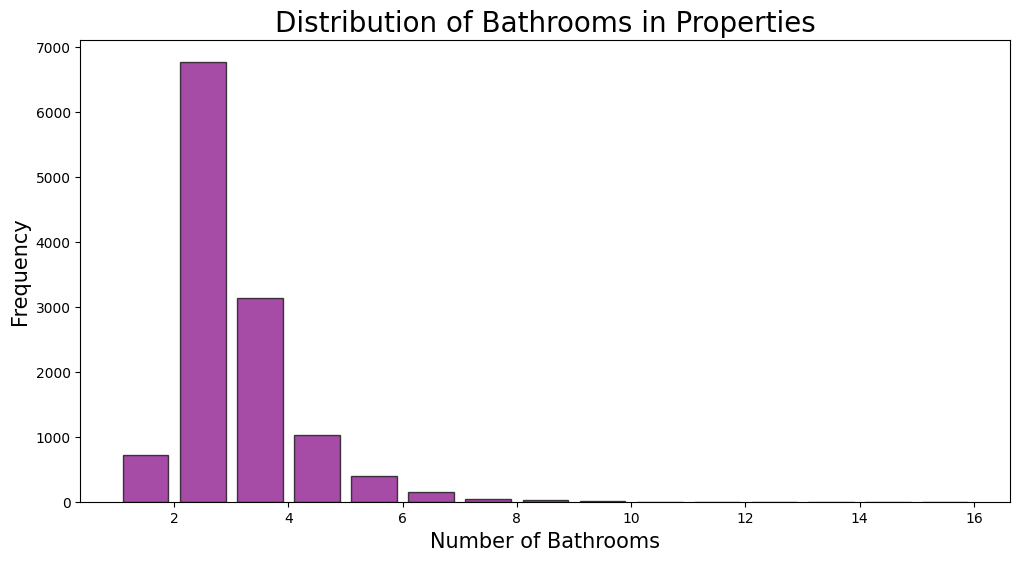

In [ ]:
# Plot the histogram for 'bath' column
plt.figure(figsize=(12, 6))
plt.hist(df['bath'], bins=15, color='purple', edgecolor='black', alpha=0.7, rwidth=0.8)

# Adding labels and title with enhanced font size
plt.title("Distribution of Bathrooms in Properties", fontsize=20)
plt.xlabel("Number of Bathrooms", fontsize=15)
plt.ylabel("Frequency", fontsize=15)

# Show the plot
plt.show()


Properties with more than 10 bathrooms:


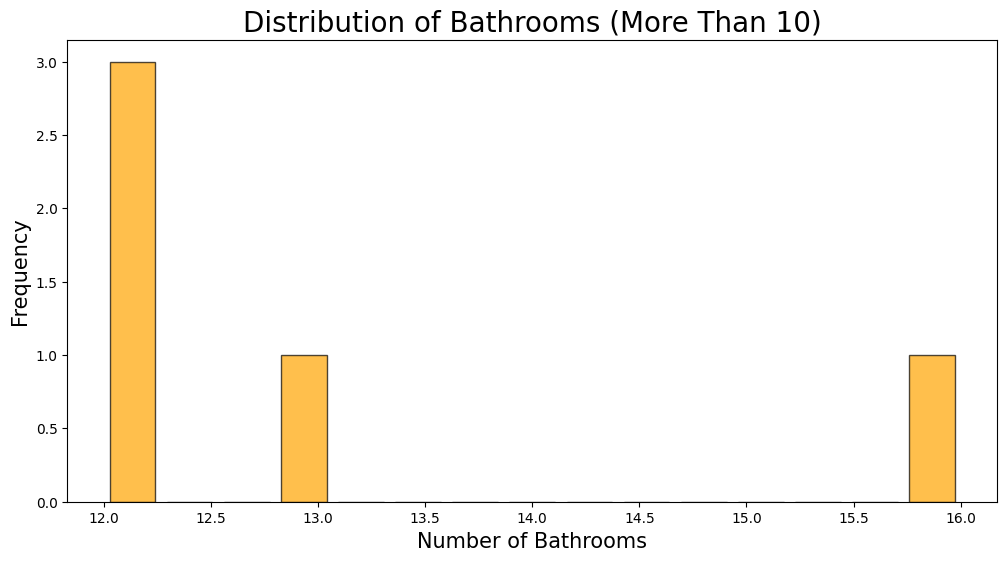

In [ ]:
# Filter data where number of bathrooms is greater than 10
bathroom_outliers = df2[df2['bath'] > 10]

# Print the filtered data
print("Properties with more than 10 bathrooms:")

# Plot the histogram for the 'bath' column with filtered data
plt.figure(figsize=(12, 6))
plt.hist(bathroom_outliers['bath'], bins=15, color='orange', edgecolor='black', alpha=0.7, rwidth=0.8)

# Adding labels and title
plt.title("Distribution of Bathrooms (More Than 10)", fontsize=20)
plt.xlabel("Number of Bathrooms", fontsize=15)
plt.ylabel("Frequency", fontsize=15)

# Show the plot
plt.show()

In [ ]:
# Filter the dataframe for houses with more than 2 more bathrooms than bedrooms
outliers_bath_bhk = df2[df2['bath'] > df2['num_bhk'] + 2]

# Display the filtered results
print(f"Houses with more than 2 bathrooms than bedrooms:\n{outliers_bath_bhk}")


Houses with more than 2 bathrooms than bedrooms:
            location       size  total_sqft  bath   price  num_bhk  \
2620           other      6 BHK     11338.0   9.0  1000.0        6   
7709   Chikkabanavar  4 Bedroom      2460.0   7.0    80.0        4   
11366     Nagasandra  4 Bedroom      7000.0   8.0   450.0        4   
12103    Thanisandra      3 BHK      1806.0   6.0   116.0        3   

       price_per_sqft  
2620      8819.897689  
7709      3252.032520  
11366     6428.571429  
12103     6423.034330  


In [ ]:
# Dropping the 'size' and 'price_per_sqft' columns from the DataFrame df9

df3=df2.drop(['size', 'price_per_sqft'], axis='columns')
df3.head()

,location,total_sqft,bath,price,num_bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


# **Performing one Hot Encoding For Location**



In [ ]:
dummies = pd.get_dummies(df3.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Concatenate df10 with dummies, excluding 'other' column
df4 = pd.concat([df3, dummies.loc[:, dummies.columns != 'other']], axis=1)

# Show the first few rows
df4.head(5)


,location,total_sqft,bath,price,num_bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,2600.0,5.0,120.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,1440.0,2.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,1521.0,3.0,95.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kothanur,1200.0,2.0,51.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

df5 = df4.drop(columns=['location'])

# Display the first two rows of df2
df5.head(2)


,total_sqft,bath,price,num_bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,120.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df5.shape

(7263, 245)

In [ ]:
df['price'].max()

3600.0

# Modelling

In [ ]:
# Dropping the 'price' column to create the feature set (X)
X = df5.drop(['price'], axis='columns')

# Display the first 3 rows of the feature set (X)
print("Feature Set (X):")
print(X.head(3))


Feature Set (X):
   total_sqft  bath  num_bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      1056.0   2.0        2                False               False   
1      2600.0   5.0        4                False               False   
2      1440.0   2.0        3                False               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0               False               False  ...        False   
1               False               False  ...        False   
2               False               False  ...        False   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                 False               False        False    

In [ ]:
# Creating the target variable (y) by extracting the 'price' column
y = df5['price']

# Display the first 3 rows of the target variable (y)
print("\nTarget Variable (y):")
print(y.head(3))


Target Variable (y):
0     39.07
1    120.00
2     62.00
Name: price, dtype: float64


In [ ]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set (features) shape:", X_train.shape)
print("Test set (features) shape:", X_test.shape)
print("Training set (target) shape:", y_train.shape)
print("Test set (target) shape:", y_test.shape)


Training set (features) shape: (5810, 244)
Test set (features) shape: (1453, 244)
Training set (target) shape: (5810,)
Test set (target) shape: (1453,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the values
y_pred = model.predict(X_test_scaled)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.83891492621314
Mean Absolute Error: 19.277063904242254
Mean Squared Error: 2332.7858116556636
Root Mean Squared Error: 48.298921433668305


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78903714, 0.78069305, 0.84667838, 0.79157486, 0.83870883])

In [ ]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8389149262131392

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)


In [ ]:
# Model Performance Metrics
print(f"R² Score: {r2_score(y_test, y_pred)}")  # R-squared, measure of how well the model fits the data
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")  # Average error between predicted and actual values
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")  # Average of the squared differences between predicted and actual values
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}")  # Square root of MSE

R² Score: 0.6966538975084078
Mean Absolute Error (MAE): 20.965787923980894
Mean Squared Error (MSE): 4392.967438123711
Root Mean Squared Error (RMSE): 66.27946467891628


In [ ]:
from sklearn.svm import SVR
# Initialize SVR model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
model.fit(X_train_scaled, y_train)



SVR()

In [ ]:
# Predict the values
y_pred = model.predict(X_test_scaled)


# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.1236220754824715
Mean Absolute Error: 37.97357179251411
Mean Squared Error: 12691.442725896399
Root Mean Squared Error: 112.65630353378545


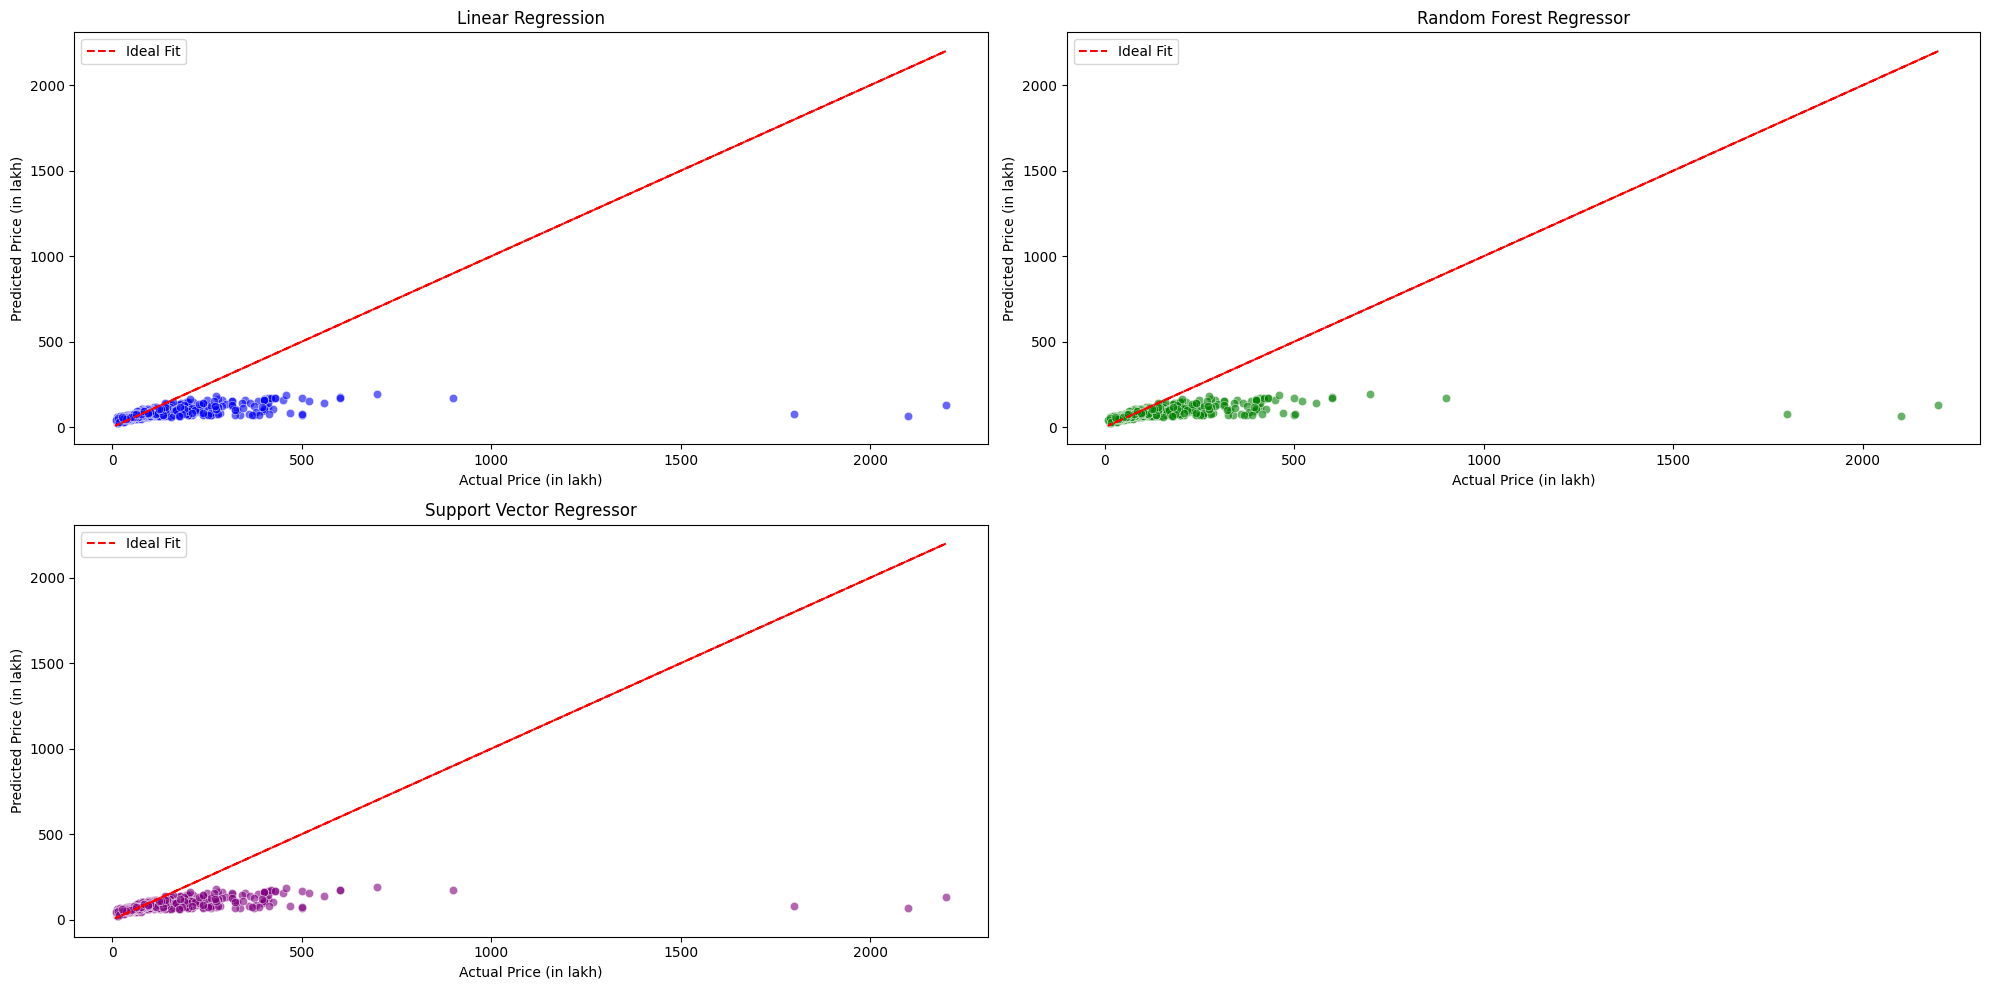

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(20, 10))

# Linear Regression
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot(y_test, y_test, color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Price (in lakh)")
plt.ylabel("Predicted Price (in lakh)")
plt.title("Linear Regression")
plt.legend()

# Random Forest Regressor
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred , color="green", alpha=0.6)
plt.plot(y_test, y_test, color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Price (in lakh)")
plt.ylabel("Predicted Price (in lakh)")
plt.title("Random Forest Regressor")
plt.legend()

# Support Vector Regressor
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_test, y=y_pred , color="purple", alpha=0.6)
plt.plot(y_test, y_test, color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Price (in lakh)")
plt.ylabel("Predicted Price (in lakh)")
plt.title("Support Vector Regressor")
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


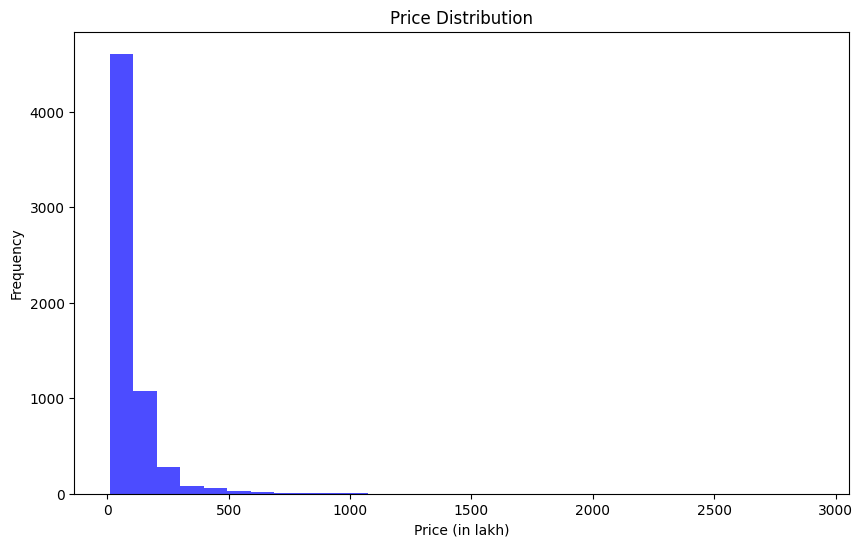

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.xlabel("Price (in lakh)")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()


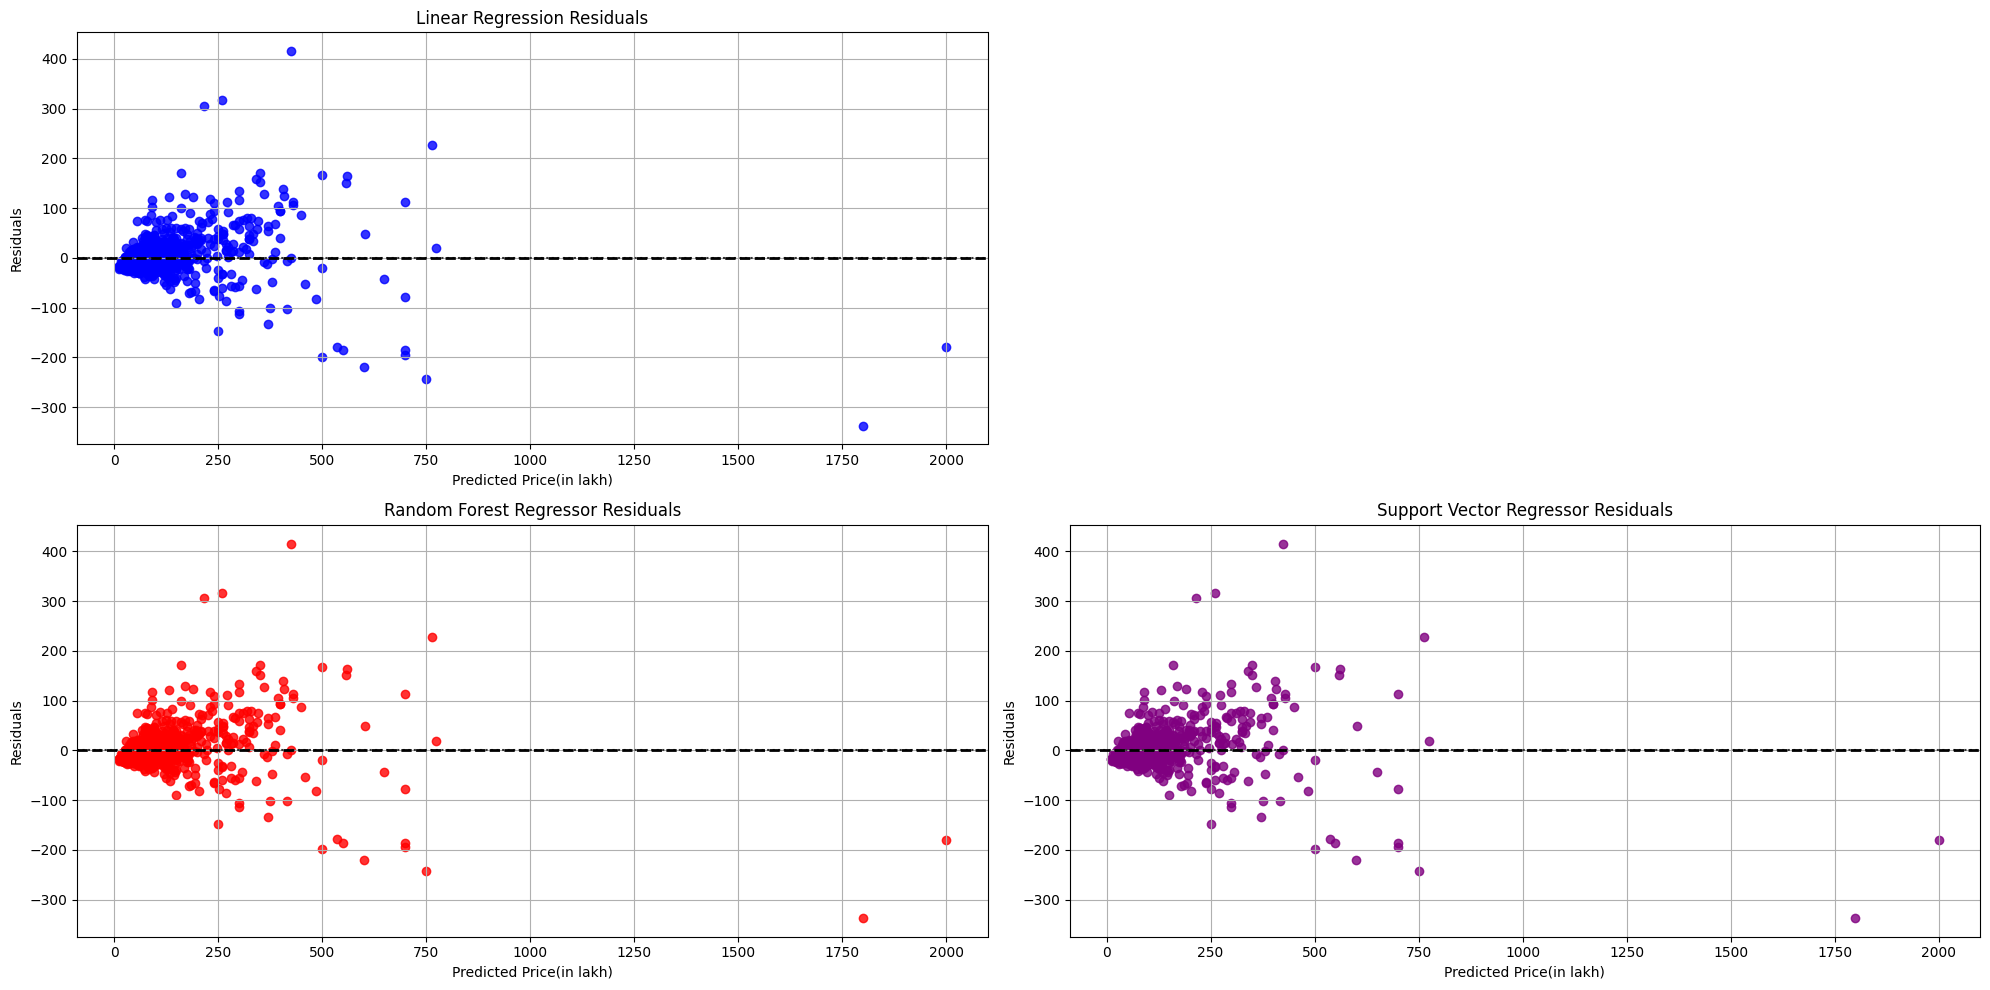

In [ ]:
# Residual Plots for Each Model
plt.figure(figsize=(20, 10))

# Linear Regression
plt.subplot(2, 2, 1)
sns.residplot(x=y_test, y=y_pred, color="blue")
plt.axhline(0, color="k", linestyle="--", lw=2)
plt.xlabel("Predicted Price(in lakh)")
plt.ylabel("Residuals")
plt.title("Linear Regression Residuals")
plt.grid(True)

# Random Forest Regressor
plt.subplot(2, 2, 3)
sns.residplot(x=y_test, y=y_pred, color="red")
plt.axhline(0, color="k", linestyle="--", lw=2)
plt.xlabel("Predicted Price(in lakh)")
plt.ylabel("Residuals")
plt.title("Random Forest Regressor Residuals")
plt.grid(True)

# Support Vector Regressor
plt.subplot(2, 2, 4)
sns.residplot(x=y_test, y=y_pred, color="purple")
plt.axhline(0, color="k", linestyle="--", lw=2)
plt.xlabel("Predicted Price(in lakh)")
plt.ylabel("Residuals")
plt.title("Support Vector Regressor Residuals")
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
